# **# Data Science CoderHouse - Comision Nro 61690**

# **Alumno:** Antonio Landriel

# Introducción

En el entorno competitivo actual, conocer a los clientes de manera profunda es fundamental para diseñar estrategias de marketing personalizadas y mejorar la experiencia de compra.

La segmentación de clientes es una técnica analítica que permite identificar grupos de consumidores con comportamientos y características similares.

Este enfoque ayuda a las empresas a ofrecer productos y promociones más alineados con las preferencias de cada grupo, mejorando la satisfacción del cliente y optimizando los ingresos.

En este análisis, se explorará un conjunto de datos compuesto por diversas características de los clientes y sus transacciones, como la edad, el tipo de producto adquirido, el precio total de las compras, y los complementos adquiridos.

Utilizando técnicas de clustering, se buscará agrupar a los clientes en segmentos homogéneos, lo que permitirá identificar patrones de comportamiento y oportunidades para una mayor personalización en las campañas de marketing.

El objetivo de este estudio es proporcionar una base sólida para la creación de estrategias comerciales dirigidas, que aumenten tanto la retención de clientes como la efectividad de las ventas.

# Descripción del problema

En un entorno de consumo diverso, las empresas enfrentan el desafío de tratar a todos los clientes de manera uniforme, lo que puede resultar en estrategias de marketing ineficaces y una menor satisfacción del cliente.

Los clientes tienen comportamientos y preferencias diferentes, por lo que es crucial identificar estos grupos para personalizar las ofertas y mejorar la relación con ellos.

Sin una segmentación adecuada, es difícil maximizar la retención y optimizar los recursos comerciales.

Este análisis busca agrupar a los clientes en segmentos homogéneos, permitiendo el desarrollo de estrategias dirigidas y efectivas.

# Objetivo


Identificar segmentos de clientes con características similares para ofrecer promociones o productos personalizados..

# Fuente de datos

https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024?resource=download

## Importación de Librerías y carga del Dataframe


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
url = "https://raw.githubusercontent.com/alandriel/CoderHouse_DataAnalitics/refs/heads/alandriel-DataSet_1/Electronic_sales_Sep2023-Sep2024.csv"
ElectronicSales = pd.read_csv(url)

#Esploracion de los datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.

- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

- **Dataframe .Shape:**
    Por medio de este comando exploramos en su generalidad nuestro Dataframe y obtenemos.
    - Cantidad de registros.
    - Cantidad de columnas.

In [33]:
print (ElectronicSales.shape)

(20000, 16)


- **Dataframe .Info:**
    Ejecutamos el comando .info para comprender el entorno de nuesrtos datos - - Cantidad de columnas.
    - Nombres de cada columna.
    - Cantidad de registros por campo.
    - Cantidad de nulos dentro de cada variable.
    - Tipo de dato de cada variable.

In [34]:
ElectronicSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        20000 non-null  int64  
 1   Age                20000 non-null  int64  
 2   Gender             19999 non-null  object 
 3   Loyalty Member     20000 non-null  object 
 4   Product Type       20000 non-null  object 
 5   SKU                20000 non-null  object 
 6   Rating             20000 non-null  int64  
 7   Order Status       20000 non-null  object 
 8   Payment Method     20000 non-null  object 
 9   Total Price        20000 non-null  float64
 10  Unit Price         20000 non-null  float64
 11  Quantity           20000 non-null  int64  
 12  Purchase Date      20000 non-null  object 
 13  Shipping Type      20000 non-null  object 
 14  Add-ons Purchased  15132 non-null  object 
 15  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(4

# Descripcion de nuestras Variables.



- Customer ID: Identificador único para cada cliente.
- Age: Edad del cliente (numérico).
- Gender: Género del cliente (Masculino o Femenino).
- Loyalty Member: (Sí/No) (Los valores cambian con el tiempo, por lo que hay - que prestar atención a quién canceló y quién se inscribió).
- Product Type: Tipo de producto electrónico vendido (p. ej., Smartphone, Laptop, Tablet).
- SKU: Código único para cada producto.
- Rating: Calificación del producto por parte del cliente (1-5 estrellas) (No debe haber calificaciones nulas).
- Order Status: Estado del pedido (Completado, Cancelado).
- Payment Method: Método utilizado para el pago (p. ej., Efectivo, Tarjeta de crédito, Paypal).
- Total Price: Precio total de la transacción (numérico).
- Unit Price: Precio por unidad del producto (numérico).
- Quantity: Número de unidades compradas (numérico).
- Purchase Date: Fecha de la compra (formato: YYYY-MM-DD).
- Shipping Type: Tipo de envío elegido (p. ej., Estándar, Urgente, Exprés).
- Add-ons Purchased: Lista de artículos adicionales comprados (p. ej., Accesorios, Garantía extendida).
-Add-on Total: Precio total de los complementos comprados (numérico).

Nuestro Dataframe esta compuesto por 16 variables y 20.000 registros. Dentro del mismo observamos algunos valores nulos que se pueden verificar desde la columna "Non-Nul Count" resultante de nuestro comando .info()

---



- **Dataframe .Head:**
   
    Por medio de este comando logramos observar una muestra de los primeros 5 registros de nuestro Dataframe que nos permite comprender las diferentes variables contenidas en el.

In [35]:
ElectronicSales.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


**Descubriendo variables relevantes:**

Por medio del comando .describe() obtendremos las principales medidas estadisticas sobre nuestras variables.

Estas medidas serviran para puntualizar sobre nuestros principales ######

In [36]:
ElectronicSales.describe()

,Customer ID,Age,Rating,Total Price,Unit Price,Quantity,Add-on Total
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10483.526550,48.994100,3.093950,3180.133419,578.631867,5.485550,62.244848
std,5631.732525,18.038745,1.223764,2544.978675,312.274076,2.870854,58.058431
min,1000.000000,18.000000,1.000000,20.750000,20.750000,1.000000,0.000000
25%,5478.000000,33.000000,2.000000,1139.680000,361.180000,3.000000,7.615000
50%,10499.500000,49.000000,3.000000,2534.490000,463.960000,5.000000,51.700000
75%,15504.000000,65.000000,4.000000,4639.600000,791.190000,8.000000,93.842500
max,19998.000000,80.000000,5.000000,11396.800000,1139.680000,10.000000,292.770000


# Datos Relevantes

- Age (Edad): La media de los clientes es de aproximadamente 49 años, con un rango de 18 a 80 años. Esto indica una amplia distribución etaria de los clientes.

- Rating (Calificación): Los clientes tienden a dar una calificación promedio de 3.09 estrellas, con un rango de 1 a 5. El 50% de los clientes califican con 3 o menos estrellas, pero hay un 25% que otorgan calificaciones de 4 o más.

- Total Price (Precio Total): El precio total medio de una transacción es de aproximadamente 3180, con una desviación estándar considerable, lo que indica que los precios varían mucho entre transacciones. El valor máximo llega hasta los 11396.

- Unit Price (Precio por Unidad): El precio promedio por unidad es de 578, con un mínimo de 20.75 y un máximo de 1139. Hay una variación notable en los precios de los productos vendidos.

- Quantity (Cantidad): Los clientes compran en promedio 5.48 unidades por transacción, con un mínimo de 1 y un máximo de 10.

- Add-on Total (Total de Complementos): Los clientes gastan un promedio de 62 en complementos, con valores que van de 0 a 292. Esto sugiere que no todos los clientes compran complementos, pero para aquellos que lo hacen, el gasto adicional puede ser significativo.


# Resumen:

Rating es crucial para analizar la satisfacción del cliente. Total Price y Quantity pueden ayudar a entender el tamaño promedio de las transacciones y el comportamiento de compra. Add-on Total es relevante para observar oportunidades de ventas adicionales (cross-selling).

# Graficas con Seaborn




# Distribución de edades de los clientes (Age Distribution):

<Axes: xlabel='Age', ylabel='Count'>

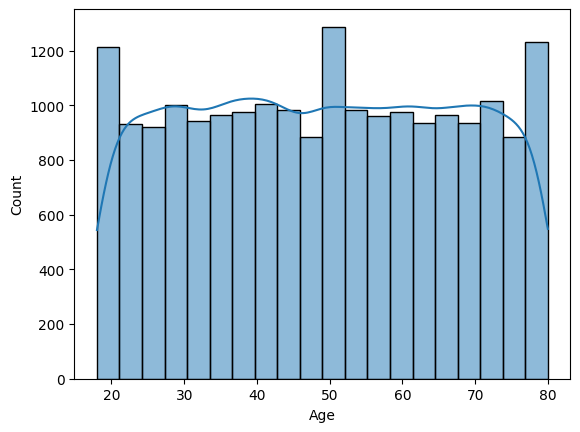

In [37]:
sns.histplot(ElectronicSales['Age'], kde=True, bins=20)

- El histograma muestra que la mayoría de los clientes tienen entre 30 y 65 años, con una ligera inclinación hacia los 49 años.

- Existen menos clientes jóvenes (menores de 30) o mayores de 70, lo que indica un público más centrado en la mediana edad.

---



# Relación entre Precio Total y Cantidad (Total Price vs Quantity):

<Axes: xlabel='Quantity', ylabel='Total Price'>

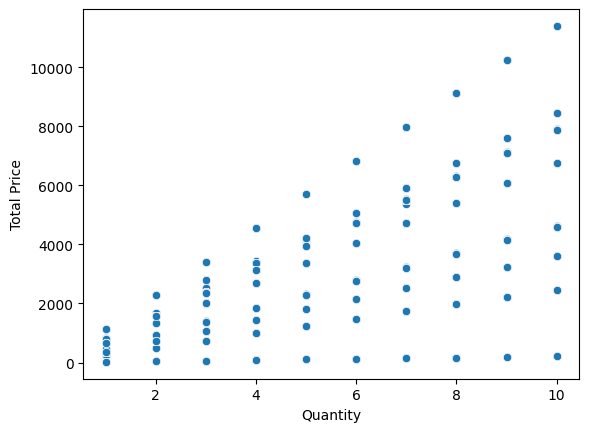

In [38]:
sns.scatterplot(x='Quantity', y='Total Price', data=ElectronicSales)


El gráfico de dispersión indica una tendencia lineal, mostrando que al aumentar la cantidad de productos comprados, el precio total también aumenta.
Sin embargo, hay algunas transacciones con una baja cantidad de productos y un alto precio total, lo que podría deberse a productos de alto valor.

---



#Boxplot de Calificaciones (Rating) por Género:



<Axes: xlabel='Gender', ylabel='Rating'>

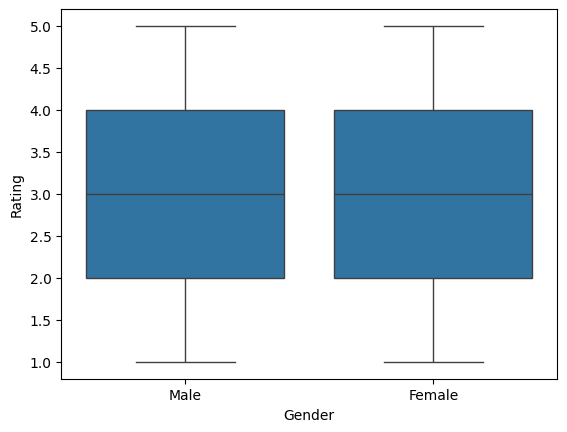

In [39]:
sns.boxplot(x='Gender', y='Rating', data=ElectronicSales)


El boxplot sugiere que las calificaciones promedio de los clientes son similares entre géneros, aunque el rango de calificaciones es un poco más amplio en los hombres.

Ambos géneros muestran una mediana de calificaciones en torno a 3 estrellas, pero las mujeres parecen dar más calificaciones cercanas a las 4 estrellas.

---



# Graficas con Matplotlib

# Diagrama de dispersión (Scatter plot) entre Precio Unitario y Precio Total:

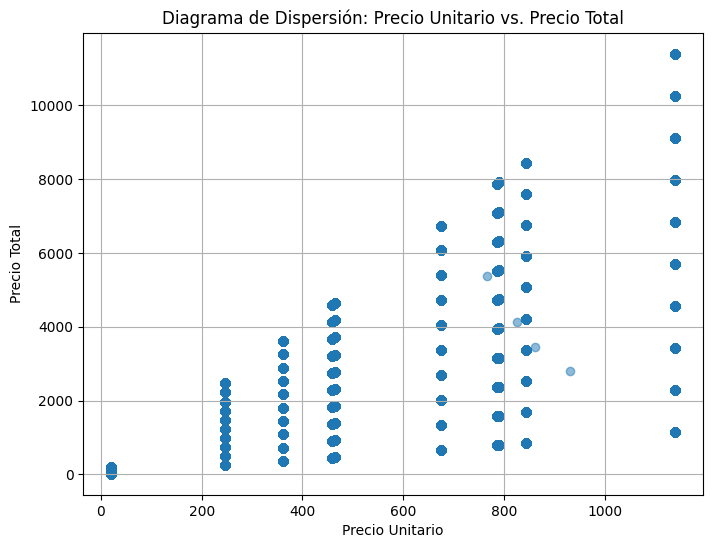

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(ElectronicSales['Unit Price'], ElectronicSales['Total Price'], alpha=0.5)
plt.xlabel('Precio Unitario')
plt.ylabel('Precio Total')
plt.title('Diagrama de Dispersión: Precio Unitario vs. Precio Total')
plt.grid(True)
plt.show()

- El scatterplot revela una relación directa entre el precio unitario y el precio total, como era de esperarse.
- Las transacciones con precios unitarios bajos suelen corresponder a precios totales más bajos, mientras que productos más caros elevan significativamente el precio total.

---



# Histograma de Cantidad de Productos Comprados:



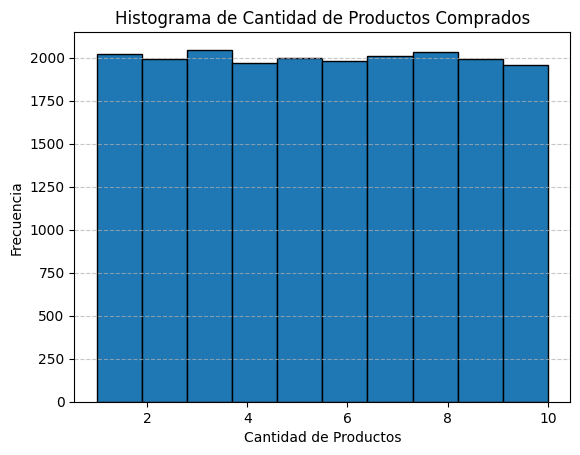

In [41]:
plt.hist(ElectronicSales['Quantity'], bins=10, edgecolor='black')  # Agrega borde negro a las barras
plt.xlabel('Cantidad de Productos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Cantidad de Productos Comprados')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agrega una cuadrícula vertical sutil
plt.show()


- La mayoría de las transacciones involucran entre 3 y 8 unidades de productos, siendo 5 la cantidad más común.
- Hay pocas transacciones con una sola unidad, y las compras de 10 unidades no son frecuentes.

---



# Gráfico de barras del Precio Total promedio por tipo de producto:



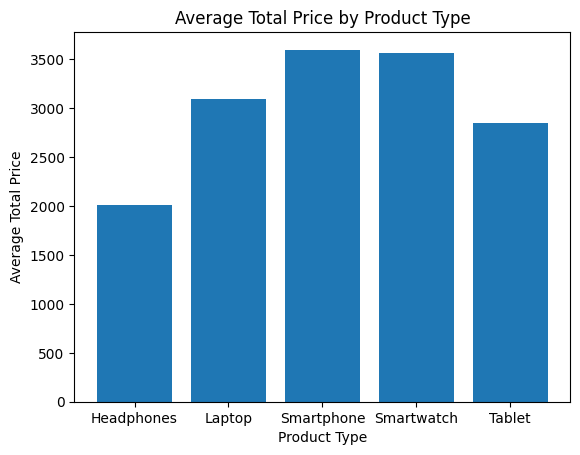

In [42]:
avg_price_per_product = ElectronicSales.groupby('Product Type')['Total Price'].mean()
plt.bar(avg_price_per_product.index, avg_price_per_product.values)
plt.xlabel('Product Type')
plt.ylabel('Average Total Price')
plt.title('Average Total Price by Product Type')
plt.show()


- Los productos con el precio total promedio más alto son los de mayor costo unitario, como los laptops o productos electrónicos de alta gama.
- Los productos con el precio total promedio más bajo podrían incluir accesorios o complementos, lo que refleja transacciones más pequeñas.

---

